# Pragmatic Pandas

<p style="font-size: 0.9rem;font-style: italic;"><img style="display: block;" src="https://live.staticflickr.com/6161/6187875169_613c2dfb00_b.jpg" alt="Chengdu Panda Breeding Centre"><a href="https://www.flickr.com/photos/50845031@N07/6187875169">"Chengdu Panda Breeding Centre"</a><span> by <a href="https://www.flickr.com/photos/50845031@N07">sanchez jalapeno</a></span> is licensed under <a href="https://creativecommons.org/licenses/by-sa/2.0/?ref=ccsearch&atype=html" style="margin-right: 5px;">CC BY-SA 2.0</a><a href="https://creativecommons.org/licenses/by-sa/2.0/?ref=ccsearch&atype=html" target="_blank" rel="noopener noreferrer" style="display: inline-block;white-space: none;margin-top: 2px;margin-left: 3px;height: 22px !important;"><img style="height: inherit;margin-right: 3px;display: inline-block;" src="https://search.creativecommons.org/static/img/cc_icon.svg" /><img style="height: inherit;margin-right: 3px;display: inline-block;" src="https://search.creativecommons.org/static/img/cc-by_icon.svg" /><img style="height: inherit;margin-right: 3px;display: inline-block;" src="https://search.creativecommons.org/static/img/cc-sa_icon.svg" /></a></p>

# But seriously...

[Pandas](https://pandas.pydata.org) allegedly stands for "PANelDAta[s?]"

- Influenced by R's dataframes
- Makes dealing with data a breeze
- Is fast and somewhat magical

# Basic concepts: DataFrame

- A lot like a 2-D array (think a "list of lists" or a spreadsheet / DB table)
- Each column is typically a single type
- Columns typically are named, and rows can be named as well (this is the "index")

# Basic concepts: Series

- A lot like a 1-D array (think either a `list` or `dict` in Python)
- Single data type
- Positions may be indexes by labels (like a `dict`)

In [1]:
import pandas as pd

# Data from CSV

In [2]:
data = pd.read_csv('./data/closing-prices.csv')
type(data)

pandas.core.frame.DataFrame

Show the first few rows:

In [3]:
data.head()

Unnamed: 0        F    TSLA  GOOG       IBM     AAPL
0  2014-01-02  12.0890  150.10   NaN  157.6001  72.7741
1  2014-01-03  12.1438  149.56   NaN  158.5430  71.1756
2  2014-01-06  12.1986  147.00   NaN  157.9993  71.5637
3  2014-01-07  12.0420  149.36   NaN  161.1508  71.0516
4  2014-01-08  12.1673  151.28   NaN  159.6728  71.5019

We can customize the types of CSVs it reads a *lot*:

In [4]:
help(pd.read_csv)

Help on function read_csv in module pandas.io.parsers:

read_csv(filepath_or_buffer: Union[str, pathlib.Path, IO[~AnyStr]], sep=',', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, skipfooter=0, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, cache_dates=True, iterator=False, chunksize=None, compression='infer', thousands=None, decimal=b'.', lineterminator=None, quotechar='"', quoting=0, doublequote=True, escapechar=None, comment=None, encoding=None, dialect=None, error_bad_lines=True, warn_bad_lines=True, delim_whitespace=False, low_memory=True, memory_map=False, float_precision=None)
    Read a comma-separated values (csv) file into Dat

In [5]:
data = pd.read_csv('./data/closing-prices.csv', index_col=0, parse_dates=[0])
data.head()

F    TSLA  GOOG       IBM     AAPL
2014-01-02  12.0890  150.10   NaN  157.6001  72.7741
2014-01-03  12.1438  149.56   NaN  158.5430  71.1756
2014-01-06  12.1986  147.00   NaN  157.9993  71.5637
2014-01-07  12.0420  149.36   NaN  161.1508  71.0516
2014-01-08  12.1673  151.28   NaN  159.6728  71.5019

In [6]:
ls -l ./data/closing-prices.csv

-rw-r--r--  1 rick446  staff  50156 Feb 26  2019 ./data/closing-prices.csv


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1007 entries, 2014-01-02 to 2017-12-29
Data columns (total 5 columns):
F       1007 non-null float64
TSLA    1007 non-null float64
GOOG    949 non-null float64
IBM     1007 non-null float64
AAPL    1007 non-null float64
dtypes: float64(5)
memory usage: 47.2 KB


## Indexes: how to slice & dice data

In [8]:
data.index

DatetimeIndex(['2014-01-02', '2014-01-03', '2014-01-06', '2014-01-07',
               '2014-01-08', '2014-01-09', '2014-01-10', '2014-01-13',
               '2014-01-14', '2014-01-15',
               ...
               '2017-12-15', '2017-12-18', '2017-12-19', '2017-12-20',
               '2017-12-21', '2017-12-22', '2017-12-26', '2017-12-27',
               '2017-12-28', '2017-12-29'],
              dtype='datetime64[ns]', length=1007, freq=None)

Get the fifth value

In [9]:
data.iloc[4]  # Gives us a series

F        12.1673
TSLA    151.2800
GOOG         NaN
IBM     159.6728
AAPL     71.5019
Name: 2014-01-08 00:00:00, dtype: float64

Get the data for Jan 3, 2017

In [10]:
data.loc['2017-01-03']   # Gives us a series

F        11.3249
TSLA    216.9900
GOOG    786.1400
IBM     155.9438
AAPL    113.0138
Name: 2017-01-03 00:00:00, dtype: float64

In [11]:
data.loc['1/3/17']   # Gives us a series

F        11.3249
TSLA    216.9900
GOOG    786.1400
IBM     155.9438
AAPL    113.0138
Name: 2017-01-03 00:00:00, dtype: float64

Get the closing price for TSLA the on Jan 3, 2017

In [12]:
data.loc['2017-01-03']['TSLA']  # this works

216.99

But this is better (faster)...

In [13]:
data.loc['2017-01-03', 'TSLA']

216.99

# Data from SQL

But what if our data comes from a database?

In [14]:
import sqlite3
con = sqlite3.connect('./data/real-estate.db')
transactions = pd.read_sql(
    'SELECT * FROM transactions', con, 
    index_col='index', 
    parse_dates=['sale_date'],
)
transactions.head()

street        city    zip state  beds  baths  sq__ft  \
index                                                                   
0          3526 HIGH ST  SACRAMENTO  95838    CA     2      1     836   
1           51 OMAHA CT  SACRAMENTO  95823    CA     3      1    1167   
2        2796 BRANCH ST  SACRAMENTO  95815    CA     2      1     796   
3      2805 JANETTE WAY  SACRAMENTO  95815    CA     2      1     852   
4       6001 MCMAHON DR  SACRAMENTO  95824    CA     2      1     797   

              type                 sale_date  price   latitude   longitude  
index                                                                       
0      Residential 2008-05-21 00:00:00-04:00  59222  38.631913 -121.434879  
1      Residential 2008-05-21 00:00:00-04:00  68212  38.478902 -121.431028  
2      Residential 2008-05-21 00:00:00-04:00  68880  38.618305 -121.443839  
3      Residential 2008-05-21 00:00:00-04:00  69307  38.616835 -121.439146  
4      Residential 2008-05-21 00:00:00-04:00  81900  38.519470 -121.435768

We can even build a quick little bulk load function in a couple of lines of pandas:

In [15]:
stock = pd.read_csv('./data/closing-prices.csv', index_col=[0], parse_dates=True)
stock.to_sql('stock', con, if_exists='append')

In [16]:
for row in con.execute('select * from stock limit 5'):
    print(row)

('2014-01-02 00:00:00', 12.089, 150.1, None, 157.6001, 72.7741)
('2014-01-03 00:00:00', 12.1438, 149.56, None, 158.543, 71.1756)
('2014-01-06 00:00:00', 12.1986, 147.0, None, 157.9993, 71.5637)
('2014-01-07 00:00:00', 12.042, 149.36, None, 161.1508, 71.0516)
('2014-01-08 00:00:00', 12.1673, 151.28, None, 159.6728, 71.5019)


In [17]:
con.execute('select count(*) from stock').fetchall()

[(3021,)]

# Data from HTML

In [18]:
!pip install html5lib

Looking in links: /Users/rick446/src/wheelhouse
You are using pip version 19.0.3, however version 20.1b1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [19]:
tables = pd.read_html(
    'https://en.wikipedia.org/wiki/Python_(genus)',
)

In [20]:
len(tables)

7

In [21]:
tables[0].head()

Python                            Python.1
0                                 NaN                                 NaN
1  Burmese python (Python bivittatus)  Burmese python (Python bivittatus)
2           Scientific classification           Scientific classification
3                            Kingdom:                            Animalia
4                             Phylum:                            Chordata

In [22]:
tables = pd.read_html(
    'https://en.wikipedia.org/wiki/List_of_United_States_cities_by_population',
    match='New York'
)
len(tables)

2

In [23]:
tables[0]

2018rank            City    State[c]  2018estimate  2010Census   Change  \
0           1     New York[d]    New York       8398748     8175133   +2.74%   
1           2     Los Angeles  California       3990456     3792621   +5.22%   
2           3         Chicago    Illinois       2705994     2695598   +0.39%   
3           4      Houston[3]       Texas       2325502     2100263  +10.72%   
4           5         Phoenix     Arizona       1660272     1445632  +14.85%   
..        ...             ...         ...           ...         ...      ...   
309       310      Edison[ad]  New Jersey        100693       99967   +0.73%   
310       311  Woodbridge[ad]  New Jersey        100450       99585   +0.87%   
311       312      San Angelo       Texas        100215       93200   +7.53%   
312       313         Kenosha   Wisconsin        100164       99218   +0.95%   
313       314       Vacaville  California        100154       92428   +8.36%   

    2016 land area 2016 land area.1 2016 population density  \
0      301.5 sq mi        780.9 km2            28,317/sq mi   
1      468.7 sq mi      1,213.9 km2             8,484/sq mi   
2      227.3 sq mi        588.7 km2            11,900/sq mi   
3      637.5 sq mi      1,651.1 km2             3,613/sq mi   
4      517.6 sq mi      1,340.6 km2             3,120/sq mi   
..             ...              ...                     ...   
309     30.1 sq mi         78.0 km2             3,389/sq mi   
310     23.3 sq mi         60.3 km2             4,351/sq mi   
311     59.9 sq mi        155.1 km2             1,681/sq mi   
312     28.0 sq mi         72.5 km2             3,577/sq mi   
313     29.0 sq mi         75.1 km2             3,449/sq mi   

    2016 population density.1                                         Location  
0                  10,933/km2    40°39′49″N 73°56′19″W﻿ / ﻿40.6635°N 73.9387°W  
1                   3,276/km2  34°01′10″N 118°24′39″W﻿ / ﻿34.0194°N 118.4108°W  
2                   4,600/km2    41°50′15″N 87°40′54″W﻿ / ﻿41.8376°N 87.6818°W  
3                   1,395/km2    29°47′12″N 95°23′27″W﻿ / ﻿29.7866°N 95.3909°W  
4                   1,200/km2  33°34′20″N 112°05′24″W﻿ / ﻿33.5722°N 112.0901°W  
..                        ...                                              ...  
309                 1,309/km2    40°30′14″N 74°20′58″W﻿ / ﻿40.5040°N 74.3494°W  
310                 1,680/km2    40°33′39″N 74°17′34″W﻿ / ﻿40.5607°N 74.2927°W  
311                   649/km2  31°26′28″N 100°27′02″W﻿ / ﻿31.4411°N 100.4505°W  
312                 1,381/km2    42°34′56″N 87°50′44″W﻿ / ﻿42.5822°N 87.8456°W  
313                 1,332/km2  38°21′14″N 121°58′22″W﻿ / ﻿38.3539°N 121.9728°W  

[314 rows x 11 columns]

How many cities per state in the top 100?

In [24]:
big_cities = tables[0].set_index('2018rank')
big_cities.head()

City    State[c]  2018estimate  2010Census   Change  \
2018rank                                                               
1         New York[d]    New York       8398748     8175133   +2.74%   
2         Los Angeles  California       3990456     3792621   +5.22%   
3             Chicago    Illinois       2705994     2695598   +0.39%   
4          Houston[3]       Texas       2325502     2100263  +10.72%   
5             Phoenix     Arizona       1660272     1445632  +14.85%   

         2016 land area 2016 land area.1 2016 population density  \
2018rank                                                           
1           301.5 sq mi        780.9 km2            28,317/sq mi   
2           468.7 sq mi      1,213.9 km2             8,484/sq mi   
3           227.3 sq mi        588.7 km2            11,900/sq mi   
4           637.5 sq mi      1,651.1 km2             3,613/sq mi   
5           517.6 sq mi      1,340.6 km2             3,120/sq mi   

         2016 population density.1  \
2018rank                             
1                       10,933/km2   
2                        3,276/km2   
3                        4,600/km2   
4                        1,395/km2   
5                        1,200/km2   

                                                 Location  
2018rank                                                   
1           40°39′49″N 73°56′19″W﻿ / ﻿40.6635°N 73.9387°W  
2         34°01′10″N 118°24′39″W﻿ / ﻿34.0194°N 118.4108°W  
3           41°50′15″N 87°40′54″W﻿ / ﻿41.8376°N 87.6818°W  
4           29°47′12″N 95°23′27″W﻿ / ﻿29.7866°N 95.3909°W  
5         33°34′20″N 112°05′24″W﻿ / ﻿33.5722°N 112.0901°W

In [25]:
big_cities['State[c]'].value_counts().head()

California    74
Texas         40
Florida       22
Colorado      12
Arizona       10
Name: State[c], dtype: int64

# Data from APIs

In [26]:
import requests

In [27]:
# I don't have any idea who's API key this is, but they're free, so....
APPID = '10d4440bbaa8581bb8da9bd1fbea5617'   
UNITS = 'imperial'
city = 'Atlanta'
resp = requests.get(
    f'http://api.openweathermap.org/data/2.5/forecast', 
    params={
        'q': city,
        'units': UNITS,
        'appid': APPID,
    }
)
data = resp.json()

In [28]:
data['list'][0]

{'dt': 1587600000,
 'main': {'temp': 63.84,
  'feels_like': 58.19,
  'temp_min': 63.84,
  'temp_max': 65.12,
  'pressure': 1016,
  'sea_level': 1017,
  'grnd_level': 980,
  'humidity': 43,
  'temp_kf': -0.71},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'clouds': {'all': 87},
 'wind': {'speed': 6.42, 'deg': 180},
 'sys': {'pod': 'd'},
 'dt_txt': '2020-04-23 00:00:00'}

In [29]:
raw_data = [
    {
        'date': row['dt_txt'], 
        **row['main'], 
        **row['weather'][0]
    } 
    for row in data['list']
]

In [30]:
raw_data[0]

{'date': '2020-04-23 00:00:00',
 'temp': 63.84,
 'feels_like': 58.19,
 'temp_min': 63.84,
 'temp_max': 65.12,
 'pressure': 1016,
 'sea_level': 1017,
 'grnd_level': 980,
 'humidity': 43,
 'temp_kf': -0.71,
 'id': 804,
 'main': 'Clouds',
 'description': 'overcast clouds',
 'icon': '04d'}

In [31]:
weather = pd.DataFrame.from_dict(raw_data)
weather.head()

date   temp  feels_like  temp_min  temp_max  pressure  \
0  2020-04-23 00:00:00  63.84       58.19     63.84     65.12      1016   
1  2020-04-23 03:00:00  61.92       56.07     61.92     62.46      1018   
2  2020-04-23 06:00:00  57.09       50.59     57.09     57.25      1015   
3  2020-04-23 09:00:00  55.26       50.05     55.26     55.27      1013   
4  2020-04-23 12:00:00  56.71       52.38     56.71     56.71      1013   

   sea_level  grnd_level  humidity  temp_kf   id    main      description icon  
0       1017         980        43    -0.71  804  Clouds  overcast clouds  04d  
1       1018         981        43    -0.30  804  Clouds  overcast clouds  04n  
2       1015         978        66    -0.09  500    Rain       light rain  10n  
3       1013         976        75    -0.01  500    Rain       light rain  10n  
4       1013         976        73     0.00  500    Rain       light rain  10d

In [32]:
weather['date'] = pd.to_datetime(weather['date'])
weather.set_index('date', inplace=True)
weather.head()

temp  feels_like  temp_min  temp_max  pressure  \
date                                                                   
2020-04-23 00:00:00  63.84       58.19     63.84     65.12      1016   
2020-04-23 03:00:00  61.92       56.07     61.92     62.46      1018   
2020-04-23 06:00:00  57.09       50.59     57.09     57.25      1015   
2020-04-23 09:00:00  55.26       50.05     55.26     55.27      1013   
2020-04-23 12:00:00  56.71       52.38     56.71     56.71      1013   

                     sea_level  grnd_level  humidity  temp_kf   id    main  \
date                                                                         
2020-04-23 00:00:00       1017         980        43    -0.71  804  Clouds   
2020-04-23 03:00:00       1018         981        43    -0.30  804  Clouds   
2020-04-23 06:00:00       1015         978        66    -0.09  500    Rain   
2020-04-23 09:00:00       1013         976        75    -0.01  500    Rain   
2020-04-23 12:00:00       1013         976        73     0.00  500    Rain   

                         description icon  
date                                       
2020-04-23 00:00:00  overcast clouds  04d  
2020-04-23 03:00:00  overcast clouds  04n  
2020-04-23 06:00:00       light rain  10n  
2020-04-23 09:00:00       light rain  10n  
2020-04-23 12:00:00       light rain  10d

What about plotting some of these?

In [33]:
%matplotlib inline

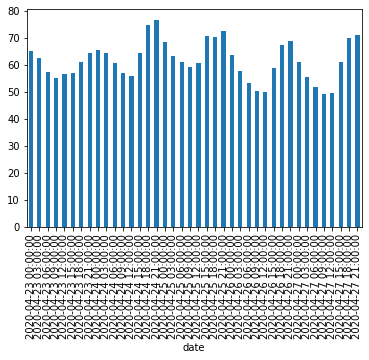

In [34]:
weather.temp_max.plot.bar()

## Easy filtering

In [35]:
from datetime import time
print(time(0))

00:00:00


In [36]:
from datetime import time
weather.loc[weather.index.time == time(0)]

temp  feels_like  temp_min  temp_max  pressure  sea_level  \
date                                                                     
2020-04-23  63.84       58.19     63.84     65.12      1016       1017   
2020-04-24  65.48       63.79     65.48     65.48      1004       1004   
2020-04-25  68.61       65.37     68.61     68.61      1008       1008   
2020-04-26  63.68       57.16     63.68     63.68      1012       1012   
2020-04-27  61.14       53.44     61.14     61.14      1019       1019   

            grnd_level  humidity  temp_kf   id    main      description icon  
date                                                                          
2020-04-23         980        43    -0.71  804  Clouds  overcast clouds  04d  
2020-04-24         968        82     0.00  500    Rain       light rain  10d  
2020-04-25         972        48     0.00  800   Clear        clear sky  01d  
2020-04-26         976        60     0.00  801  Clouds       few clouds  02d  
2020-04-27         982        45     0.00  801  Clouds       few clouds  02d

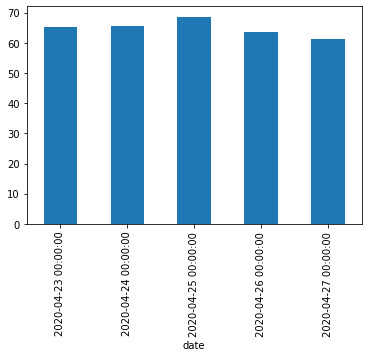

In [37]:
weather[weather.index.time == time(0)].temp_max.plot.bar()

## ... and aggregation

In [38]:
transactions.head()

street        city    zip state  beds  baths  sq__ft  \
index                                                                   
0          3526 HIGH ST  SACRAMENTO  95838    CA     2      1     836   
1           51 OMAHA CT  SACRAMENTO  95823    CA     3      1    1167   
2        2796 BRANCH ST  SACRAMENTO  95815    CA     2      1     796   
3      2805 JANETTE WAY  SACRAMENTO  95815    CA     2      1     852   
4       6001 MCMAHON DR  SACRAMENTO  95824    CA     2      1     797   

              type                 sale_date  price   latitude   longitude  
index                                                                       
0      Residential 2008-05-21 00:00:00-04:00  59222  38.631913 -121.434879  
1      Residential 2008-05-21 00:00:00-04:00  68212  38.478902 -121.431028  
2      Residential 2008-05-21 00:00:00-04:00  68880  38.618305 -121.443839  
3      Residential 2008-05-21 00:00:00-04:00  69307  38.616835 -121.439146  
4      Residential 2008-05-21 00:00:00-04:00  81900  38.519470 -121.435768

In [39]:
transactions.groupby('zip').price.mean()

zip
95603    405890.800000
95608    295684.750000
95610    226436.285714
95614    300000.000000
95619    216033.000000
             ...      
95838    149461.351351
95841    213806.142857
95842    143281.772727
95843    232496.393939
95864    364400.000000
Name: price, Length: 68, dtype: float64

## ... and merging

In [40]:
sales = pd.read_csv('./data/sales.csv', parse_dates=['date'])
sales.head()

order_num  line_num       date       sku  qty
0          0         0 2011-01-01   sku4333    6
1          0         1 2011-01-01  sku76536    7
2          1         0 2011-01-02  sku75108    3
3          1         1 2011-01-02  sku78838    9
4          1         2 2011-01-02  sku77480    9

In [41]:
prices = pd.read_csv('./data/prices.csv', index_col='sku') 
prices.head()

Unnamed: 0 category    price
sku                                  
sku0000           0  Toilets  2085.11
sku0001           1     Misc  3601.62
sku0002           2     Misc     0.57
sku0003           3  Faucets  1511.66
sku0004           4  Toilets   733.78

In [42]:
merged = pd.merge(sales, prices, left_on='sku', right_index=True)
merged.head()

order_num  line_num       date       sku  qty  Unnamed: 0 category  \
0             0         0 2011-01-01   sku4333    6        4333  Showers   
1601        641         3 2012-10-10   sku4333    8        4333  Showers   
1             0         1 2011-01-01  sku76536    7       76536  Faucets   
2             1         0 2011-01-02  sku75108    3       75108     Misc   
3             1         1 2011-01-02  sku78838    9       78838  Showers   

        price  
0     1563.90  
1601  1563.90  
1     3121.99  
2      819.55  
3     2531.54

Now we can do stuff like 'total revenue of toilets in (each) June'

In [43]:
merged['line_price'] = merged.qty * merged.price
merged.head()

order_num  line_num       date       sku  qty  Unnamed: 0 category  \
0             0         0 2011-01-01   sku4333    6        4333  Showers   
1601        641         3 2012-10-10   sku4333    8        4333  Showers   
1             0         1 2011-01-01  sku76536    7       76536  Faucets   
2             1         0 2011-01-02  sku75108    3       75108     Misc   
3             1         1 2011-01-02  sku78838    9       78838  Showers   

        price  line_price  
0     1563.90     9383.40  
1601  1563.90    12511.20  
1     3121.99    21853.93  
2      819.55     2458.65  
3     2531.54    22783.86

In [44]:
june_sales = merged[
    (merged.date.dt.month == 6)
    & (merged.category == 'Toilets')
].groupby(merged.date.dt.year).line_price.sum()
june_sales

date
2011    232908.07
2012    240029.48
2013    215866.60
Name: line_price, dtype: float64

Or 'what were the sales by category each year'?

In [45]:
category_annual_sales = merged.groupby([merged.date.dt.year, 'category']).line_price.sum()
category_annual_sales

date  category
2011  Faucets     2657152.50
      Misc        2986589.44
      Showers     2502692.92
      Toilets     2750527.75
2012  Faucets     2783274.89
      Misc        2774814.75
      Showers     2957770.84
      Toilets     2634715.88
2013  Faucets     1642582.49
      Misc        2356996.81
      Showers     2101597.81
      Toilets     1744312.15
Name: line_price, dtype: float64

Or even 'what was the *best* category each year?

In [46]:
data = category_annual_sales.reset_index()
data.head()

date category  line_price
0  2011  Faucets  2657152.50
1  2011     Misc  2986589.44
2  2011  Showers  2502692.92
3  2011  Toilets  2750527.75
4  2012  Faucets  2783274.89

In [47]:
g = data.groupby('date')

In [48]:
data.loc[g.line_price.idxmax()]

date category  line_price
1  2011     Misc  2986589.44
6  2012  Showers  2957770.84
9  2013     Misc  2356996.81

# Speed & space

Pandas is not only convenient, but it's also faster & uses less memory than comparable Python objects:

In [49]:
!pip install pympler

Looking in links: /Users/rick446/src/wheelhouse
You are using pip version 19.0.3, however version 20.1b1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [50]:
from pympler.asizeof import asizeof

In [51]:
import random

In [52]:
rand_floats = [random.random() for i in range(10_000_000)]

In [53]:
py_size = asizeof(rand_floats)
py_size

321528064

In [54]:
pd_data = pd.Series(rand_floats)

In [55]:
pd_size = asizeof(pd_data)
pd_size

160002944

In [56]:
py_size / pd_size

2.009513424952981

What about speed?

In [57]:
%timeit sum(rand_floats)

53 ms ± 822 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [58]:
%timeit pd_data.sum()

43.7 ms ± 737 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


Better, but not great... pandas indexes actually slow us down here somewhat

In [59]:
%timeit pd_data.values.sum()

4.01 ms ± 55.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


... and we can get a 10x improvement by using the underlying Numpy array

# ... and one more thing (a bit of Pandas magic)

Pandas can read from urls, and it has a fwf (fixed-width file) reader:

In [60]:
url = 'http://noaa-ghcn-pds.s3.amazonaws.com/ghcnd-stations.txt'
ground_stations = pd.read_fwf(url, header=None)
ground_stations.head()

0        1        2     3                      4    5    6  \
0  ACW00011604  17.1167 -61.7833  10.1  ST JOHNS COOLIDGE FLD  NaN  NaN   
1  ACW00011647  17.1333 -61.7833  19.2               ST JOHNS  NaN  NaN   
2  AE000041196  25.3330  55.5170  34.0    SHARJAH INTER. AIRP  NaN  GSN   
3  AEM00041194  25.2550  55.3640  10.4             DUBAI INTL  NaN  NaN   
4  AEM00041217  24.4330  54.6510  26.8         ABU DHABI INTL  NaN  NaN   

         7  
0      NaN  
1      NaN  
2  41196.0  
3  41194.0  
4  41217.0

But if you install s3fs, you can also read from s3:// URLs (**and** it will use your AWS CLI credentials if they are configured):

In [61]:
!pip install s3fs

Looking in links: /Users/rick446/src/wheelhouse
You are using pip version 19.0.3, however version 20.1b1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [62]:
ground_stations = pd.read_fwf('s3://noaa-ghcn-pds/ghcnd-stations.txt', header=None, index_col=0)
ground_stations.head()

1        2     3                      4    5    6        7
0                                                                            
ACW00011604  17.1167 -61.7833  10.1  ST JOHNS COOLIDGE FLD  NaN  NaN      NaN
ACW00011647  17.1333 -61.7833  19.2               ST JOHNS  NaN  NaN      NaN
AE000041196  25.3330  55.5170  34.0    SHARJAH INTER. AIRP  NaN  GSN  41196.0
AEM00041194  25.2550  55.3640  10.4             DUBAI INTL  NaN  NaN  41194.0
AEM00041217  24.4330  54.6510  26.8         ABU DHABI INTL  NaN  NaN  41217.0

In [63]:
pd.read_csv('s3://noaa-ghcn-pds/csv/1763.csv', header=None).head()

0         1     2   3   4    5  6   7
0  ITE00100554  17630101  TMAX -36 NaN  NaN  E NaN
1  ITE00100554  17630101  TMIN -50 NaN  NaN  E NaN
2  ITE00100554  17630102  TMAX -26 NaN  NaN  E NaN
3  ITE00100554  17630102  TMIN -40 NaN  NaN  E NaN
4  ITE00100554  17630103  TMAX  -9 NaN  NaN  E NaN

In [64]:
frames = [
    pd.read_csv(
        f's3://noaa-ghcn-pds/csv/{year}.csv', 
        header=None, parse_dates=[1], 
        infer_datetime_format=True
    )
    for year in range(1763, 1800)
]

In [65]:
data = pd.concat(frames)

In [66]:
data.head()

0          1     2   3   4    5  6   7
0  ITE00100554 1763-01-01  TMAX -36 NaN  NaN  E NaN
1  ITE00100554 1763-01-01  TMIN -50 NaN  NaN  E NaN
2  ITE00100554 1763-01-02  TMAX -26 NaN  NaN  E NaN
3  ITE00100554 1763-01-02  TMIN -40 NaN  NaN  E NaN
4  ITE00100554 1763-01-03  TMAX  -9 NaN  NaN  E NaN

In [67]:
data = data[data.columns[:4]]

In [68]:
data.head()

0          1     2   3
0  ITE00100554 1763-01-01  TMAX -36
1  ITE00100554 1763-01-01  TMIN -50
2  ITE00100554 1763-01-02  TMAX -26
3  ITE00100554 1763-01-02  TMIN -40
4  ITE00100554 1763-01-03  TMAX  -9

In [69]:
data.columns = 'station date measurement value'.split()

In [70]:
data.head()

station       date measurement  value
0  ITE00100554 1763-01-01        TMAX    -36
1  ITE00100554 1763-01-01        TMIN    -50
2  ITE00100554 1763-01-02        TMAX    -26
3  ITE00100554 1763-01-02        TMIN    -40
4  ITE00100554 1763-01-03        TMAX     -9

In [71]:
milan = data[
    (data.station == 'ITE00100554')
    & (data.measurement == 'TMAX')
].set_index('date')
milan.head()

station measurement  value
date                                      
1763-01-01  ITE00100554        TMAX    -36
1763-01-02  ITE00100554        TMAX    -26
1763-01-03  ITE00100554        TMAX     -9
1763-01-04  ITE00100554        TMAX     -4
1763-01-05  ITE00100554        TMAX     21

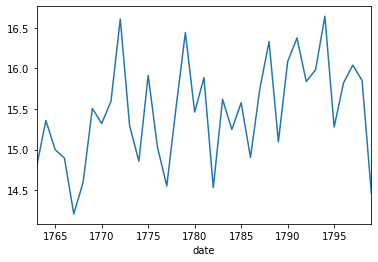

In [72]:
(milan.value.groupby(milan.index.year).mean() / 10).plot()

# And you can even use gzipped files...

In [73]:
data = pd.read_csv('data/complaints.csv.gz', parse_dates=['Date received'])
data.head()

Date received                                            Product State  \
0    2019-03-15                                    Debt collection    FL   
1    2019-03-15  Credit reporting, credit repair services, or o...    FL   
2    2019-03-15  Credit reporting, credit repair services, or o...    TX   
3    2019-03-15  Credit reporting, credit repair services, or o...    FL   
4    2019-03-15  Credit reporting, credit repair services, or o...    TX   

  ZIP code  
0    334XX  
1    34243  
2    773XX  
3    34243  
4    773XX